In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [136]:
data = {
    'weight':[180,200,150,170,160,140],
    'sweetness' : [7,6,4,5,6,3],
    'label' : ['apple', 'apple', 'orange', 'orange', 'apple', 'orange']
}

In [137]:
df = pd.DataFrame(data)

In [138]:
df.shape

(6, 3)

In [139]:
def get_distance(df, sample,minkowski_coeff = 1):
    k = minkowski_coeff
    x = df.iloc[:, :-1]
    m, n = x.shape
    if x.shape[1] != len(sample):
        print("shape not correct")
        return
    answers = []
    for i in range(m):
        temp  =0
        for j in range(n):
            temp += abs(x.iloc[i, j] - sample[j])**k
        temp = temp**(1/k)
        answers.append(temp.round(4))
    return answers

In [140]:
for k in [1,2,3,4]:
    temp  = get_distance(df, [165,5.5], minkowski_coeff= k)
    print("minkowski: ", k)
    print(temp)


minkowski:  1
[16.5, 35.5, 16.5, 5.5, 5.5, 27.5]
minkowski:  2
[15.0748, 35.0036, 15.0748, 5.0249, 5.0249, 25.1247]
minkowski:  3
[15.005, 35.0, 15.005, 5.0017, 5.0017, 25.0083]
minkowski:  4
[15.0004, 35.0, 15.0004, 5.0001, 5.0001, 25.0006]


In [141]:
from collections import defaultdict
def k_nearest(df, sample, k = 3, minkowski= 2):
    temp = get_distance(df, sample, minkowski_coeff= minkowski)
    df_temp = df.copy()
    df_temp['distances'] = temp
    df_sorted = df_temp.sort_values(by='distances').reset_index(drop=True)
    #print(df_sorted)
    class_dict = defaultdict(int)
    for i in range(k):
        #print(df_sorted['label'][i])
        class_dict[df_sorted['label'][i]] += 1
    answers = [(i, j) for i, j in class_dict.items()]
    answers = sorted(answers, key = lambda x: x[1], reverse =True)
    #print(answers)
    return answers[0][0]
    
    
    

In [142]:
k_nearest(df, [165,5.5], k =3, minkowski= 1)

'apple'

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


k = 3  
knn = KNeighborsClassifier(n_neighbors=k ,metric='euclidean')
knn.fit(df.iloc[:, :-1], df['label'])
y_pred = knn.predict(np.array([[165, 5.5]]))
print(y_pred)

['orange']


In [146]:
import random
adv = df.copy()
for i in range(1500):
    x = random.uniform(100.0, 240.0)  # Float between 100 and 250
    y = random.uniform(2.0, 8.0) 
    ans = k_nearest(df, [x,y], k =3, minkowski= 2)
    y_pred = knn.predict(np.array([[x, y]]))[0]
    new_row = pd.DataFrame({'weight': [x], 'sweetness': [y], 'label': [ans], 'skikit': [y_pred]})
    adv = pd.concat([adv, new_row], ignore_index=True)
    
    

In [149]:
adv
value_counts = adv['label'].value_counts()
print(value_counts)
print(adv[6:])

label
apple     792
orange    714
Name: count, dtype: int64
          weight  sweetness   label  skikit
6     130.591199   7.384450  orange  orange
7     229.876227   2.843109   apple   apple
8     230.293399   4.290211   apple   apple
9     217.009972   3.131934   apple   apple
10    177.368541   6.093209   apple   apple
...          ...        ...     ...     ...
1501  115.719898   2.023168  orange  orange
1502  129.212376   4.236096  orange  orange
1503  199.425792   4.299117   apple   apple
1504  129.436133   4.720721  orange  orange
1505  114.718597   2.973032  orange  orange

[1500 rows x 4 columns]


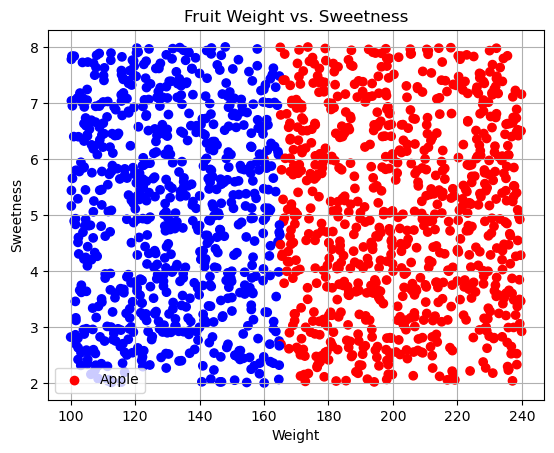

In [150]:
colors = adv['label'].map({'apple': 'red', 'orange': 'blue'})

# Create the scatter plot
plt.scatter(adv['weight'], adv['sweetness'], color=colors)
plt.xlabel('Weight')
plt.ylabel('Sweetness')
plt.title('Fruit Weight vs. Sweetness')
plt.legend(['Apple', 'Orange'])
plt.grid()

In [151]:
import pandas as pd
import numpy as np
from collections import Counter

# Step 1: Create the dataset
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

In [152]:
def entropy(target_col):
    # Calculate the entropy of the target variable
    count = Counter(target_col)
    total_instances = len(target_col)
    ent = 0.0
    for label in count:
        probability = count[label] / total_instances
        ent -= probability * np.log2(probability)
    return ent

# Calculate the entropy for the Diagnosis
entropy_diagnosis = entropy(df['Diagnosis'])
print(f'Entropy of Diagnosis: {entropy_diagnosis:.3f}')

Entropy of Diagnosis: 1.000


In [153]:
def information_gain(data, feature, target):
    # Calculate information gain for a feature
    total_entropy = entropy(data[target])
    
    # Group by the feature
    values = data[feature].unique()
    weighted_entropy = 0.0
    
    for value in values:
        subset = data[data[feature] == value]
        subset_entropy = entropy(subset[target])
        weighted_entropy += (len(subset) / len(data)) * subset_entropy
    
    return total_entropy - weighted_entropy

# Calculate information gain for each feature
features = ['Age', 'Blood Pressure', 'Cholesterol']
info_gains = {feature: information_gain(df, feature, 'Diagnosis') for feature in features}

print("Information Gains:")
for feature, gain in info_gains.items():
    print(f"{feature}: {gain:.3f}")

Information Gains:
Age: 1.000
Blood Pressure: 1.000
Cholesterol: 1.000


In [154]:
# Choose the root node
root_node = max(info_gains, key=info_gains.get)
print(f"Root Node: {root_node}")

Root Node: Age


In [155]:
class Node:
    def __init__(self, feature=None, value=None, left=None, right=None, prediction=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.prediction = prediction

def build_tree(data, target):
    # If all target values are the same, return a leaf node
    if len(set(data[target])) == 1:
        return Node(prediction=data[target].values[0])
    
    if len(data) == 0:
        return None
    
    # Select the best feature for splitting
    feature_gains = {feature: information_gain(data, feature, target) for feature in features}
    best_feature = max(feature_gains, key=feature_gains.get)
    
    # Create a new tree node
    root = Node(feature=best_feature)
    
    # Split the dataset on the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        child_node = build_tree(subset, target)
        if best_feature == root.feature:
            if root.left is None:
                root.left = child_node
            else:
                root.right = child_node
            
    return root

# Build the decision tree
decision_tree = build_tree(df, 'Diagnosis')

In [156]:
def predict(tree, instance):
    if tree.prediction is not None:
        return tree.prediction
    
    feature_value = instance[tree.feature]
    
    if feature_value == tree.value:
        return predict(tree.left, instance)
    else:
        return predict(tree.right, instance)

# Example prediction
new_patient = {'Age': 50, 'Blood Pressure': 'Low', 'Cholesterol': 'Normal'}
diagnosis = predict(decision_tree, new_patient)
print(f'Prediction for the new patient: {diagnosis}')

Prediction for the new patient: Sick


In [157]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the same dataset as before
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

# Convert categorical variables into numerical
df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

# Features and labels
X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

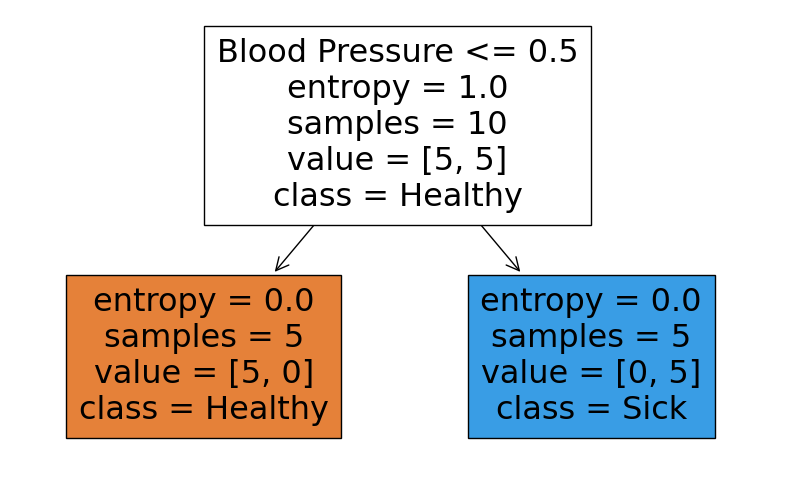

In [158]:
# Initialize and fit the model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Healthy', 'Sick'], filled=True)
plt.show()

In [159]:
new_patient = np.array([[50, 0, 0]])  # Age: 50, Blood Pressure: Low (0), Cholesterol: Normal (0)
prediction = clf.predict(new_patient)
diagnosis = 'Healthy' if prediction[0] == 0 else 'Sick'
print(f'Prediction for the new patient: {diagnosis}')

Prediction for the new patient: Healthy
